In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

import warnings

warnings.filterwarnings('ignore')

In [2]:
from datasets import load_dataset

full_data = pd.DataFrame(load_dataset('go_emotions', split='all'))
data = full_data
data.head(10)

No config specified, defaulting to: go_emotions/simplified
Found cached dataset go_emotions (C:/Users/venka/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


,text,labels,id
0,My favourite food is anything I didn't have to...,[27],eebbqej
1,"Now if he does off himself, everyone will thin...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
5,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,[26],edvnz26
6,Yes I heard abt the f bombs! That has to be wh...,[15],ee3b6wu
7,We need more boards and to create a bit more s...,"[8, 20]",ef4qmod
8,Damn youtube and outrage drama is super lucrat...,[0],ed8wbdn
9,It might be linked to the trust factor of your...,[27],eczgv1o


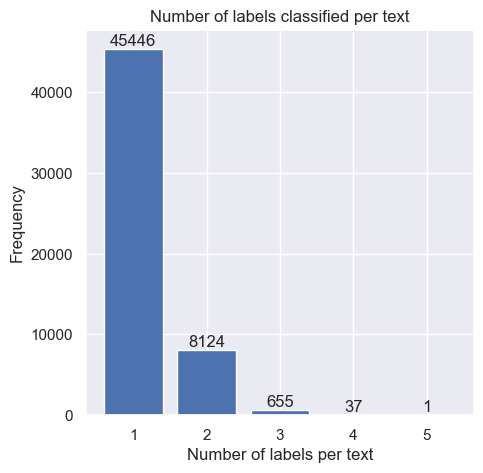

In [3]:
x = data['labels'].apply(len)
lab = range(1, max(x) + 1)
freq = [x.values.tolist().count(i) for i in lab]
plt.figure(figsize=(5, 5))
plt.bar(lab,freq)

for i in range(0,max(x)):
    plt.text(i+1, freq[i], freq[i], ha='center', va='bottom')
plt.title("Number of labels classified per text")
plt.xlabel("Number of labels per text")
plt.ylabel("Frequency")
plt.show()

In [4]:
# create dictionary
label_dict = {
    5: 18,
    6: 7,
    8: 17,
    11: 3,
    12: 9,
    13: 17,
    14: 10,
    16: 3,
    19: 10,
    21: 4,
    23: 15,
    24: 22,
    25: 9,
    26: 1
}

label_guide = {
    "Admiration": 0,
    "Amusement": 1,
    "Anger": 2,
    "Annoyance": 3,
    "Approval": 4,
    "Caring": 5,
    "Confusion": 6,
    "Curiosity": 7,
    "Desire": 8,
    "Disappointment": 9,
    "Disapproval": 10,
    "Disgust": 11,
    "Embarrassment": 12,
    "Excitement": 13,
    "Fear": 14,
    "Gratitude": 15,
    "Grief": 16,
    "Joy": 17,
    "Love": 18,
    "Nervousness": 19,
    "Optimism": 20,
    "Pride": 21,
    "Realization": 22,
    "Relief": 23,
    "Remorse": 24,
    "Sadness": 25,
    "Surprise": 26,
    "Neutral": 27
}

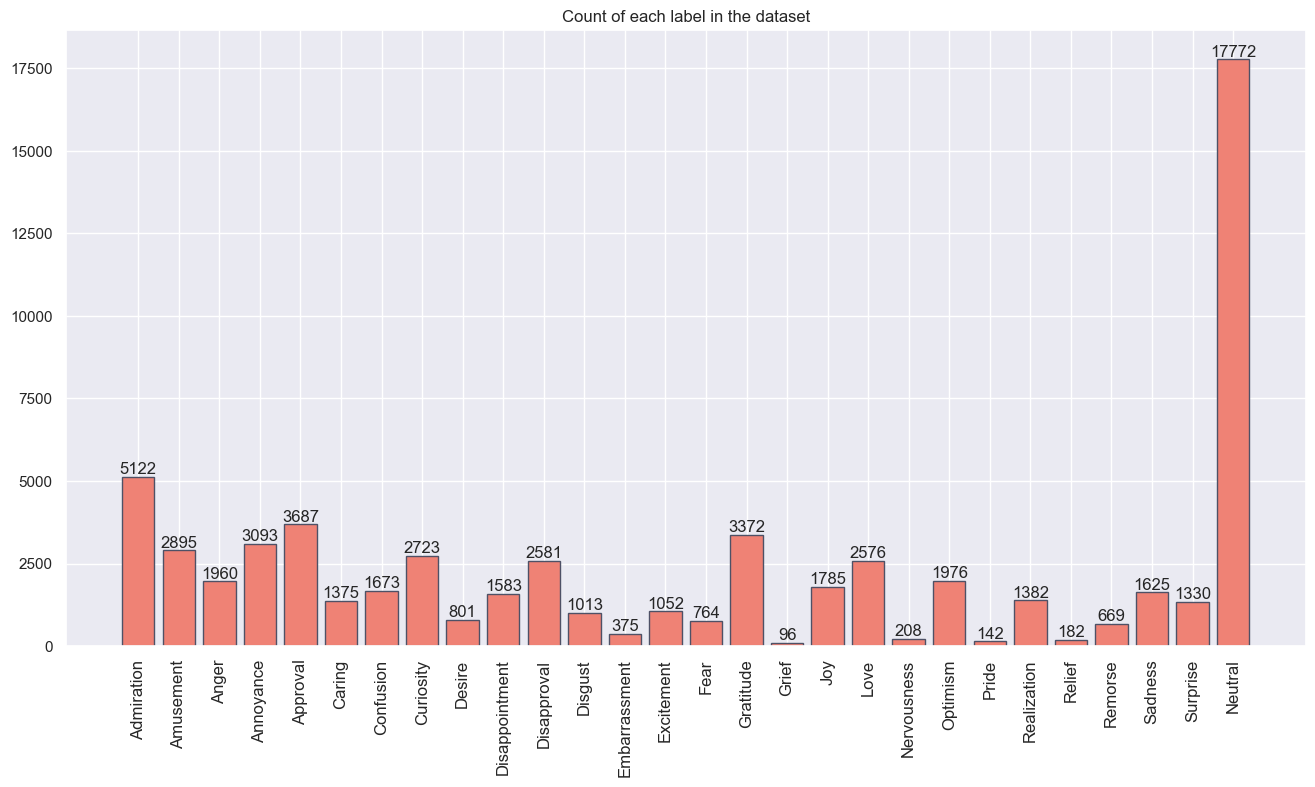

In [5]:
ls = []

for i in range(len(data['labels'])):
    ls.extend(data['labels'][i])

# print(ls)

ls1 = [ls.count(i) for i in range(28)]
# print(ls1)
plt.figure(figsize=(16, 8))
plt.xticks(rotation=90, fontsize=12)
plt.bar(label_guide.keys(), ls1, color='#EF8275', edgecolor='#4E5166')

# display text on the bars
for i in range(28):
    plt.text(i, ls1[i], ls1[i], ha='center', va='bottom')
plt.title("Count of each label in the dataset")
plt.show()

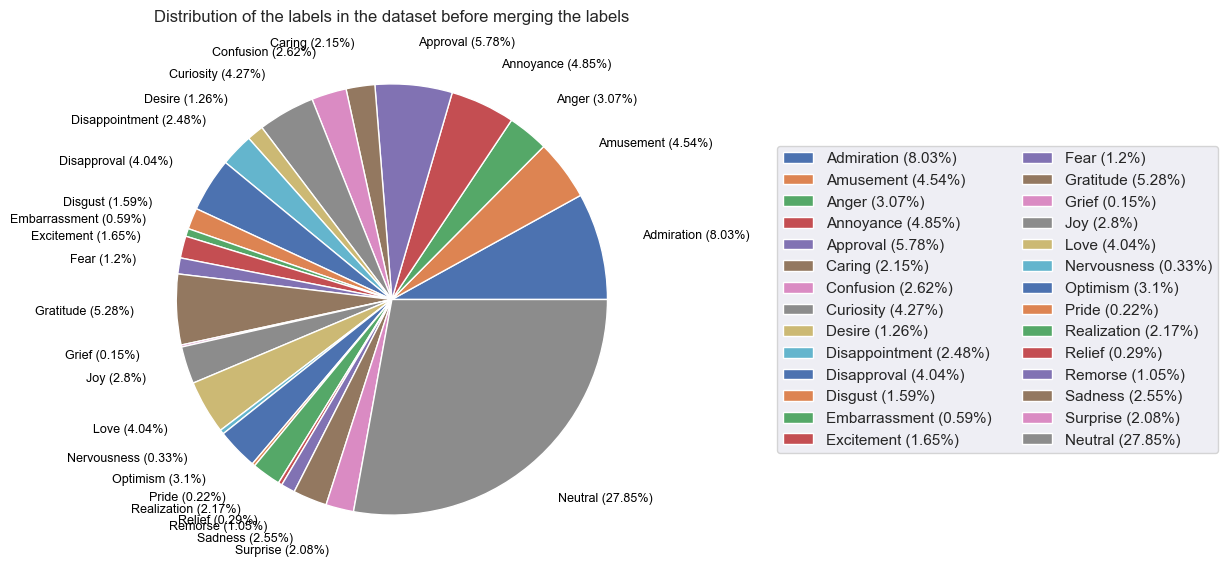

In [6]:
pct_labels = []
for i in range(len(ls1)):
    pct = round(ls1[i]/sum(ls1) * 100,2)
    pct_labels.append(list(label_guide.keys())[i] + " (" + str(pct) + "%)")
                      
plt.figure(figsize=(14,7))

plt.pie(ls1, labels=pct_labels, textprops={'fontsize':9, 'color':'black'}, labeldistance=1.2)
plt.legend(loc="center left", ncol=2, bbox_to_anchor=(1.2, 0.5))
plt.title("Distribution of the labels in the dataset before merging the labels")
plt.show()

In [7]:
# replace
for row in range(len(data['labels'])):
    for num in range(len(data['labels'][row])):
        if data['labels'][row][num] in label_dict.keys():
            data['labels'][row][num] = label_dict[data['labels'][row][num]]

# take the most frequent value
for row in range(len(data['labels'])):
    data['labels'][row] = max(data['labels'][row],
                              key=data['labels'][row].count)

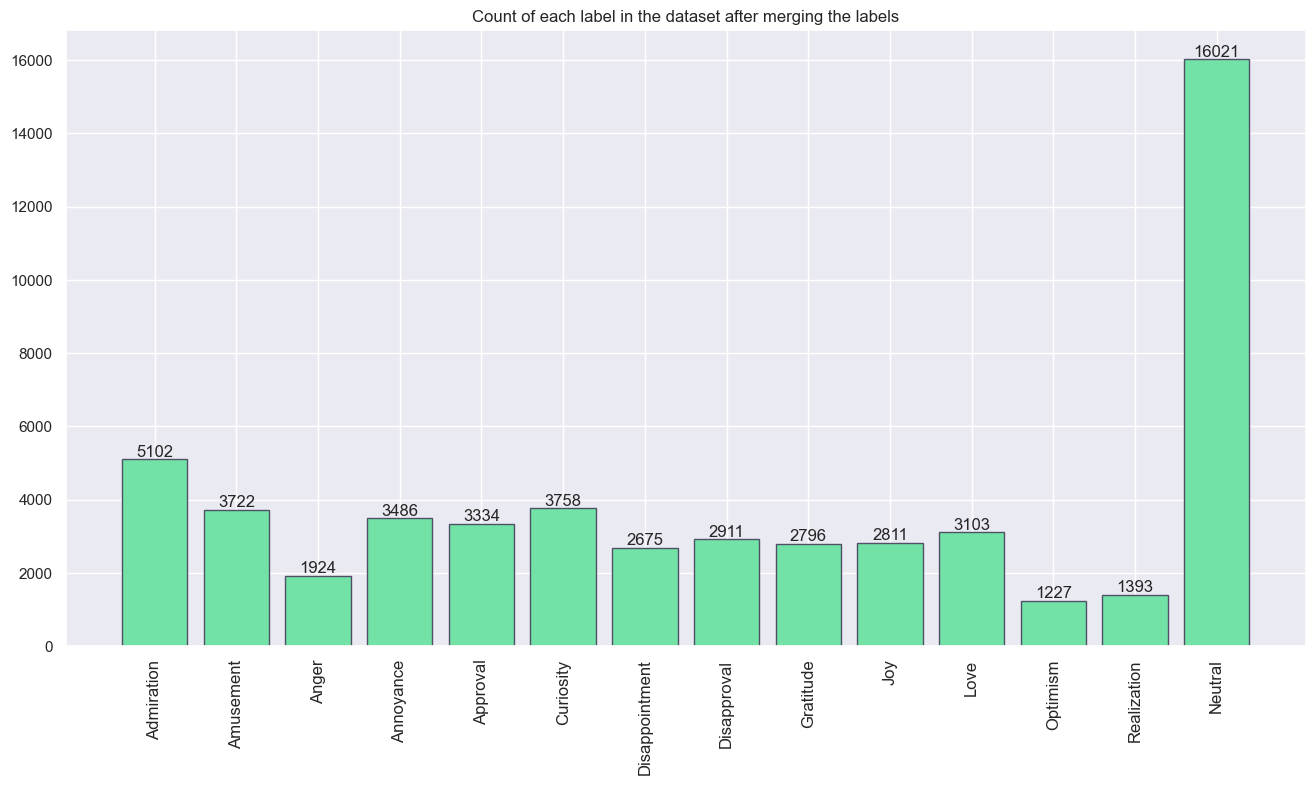

In [8]:
# visualizing according to the labels

counts = {}
for i in label_guide.keys():
    if (data['labels'] == label_guide[i]).sum() != 0:
        counts[i] = (data['labels'] == label_guide[i]).sum()

plt.figure(figsize=(16, 8))
plt.xticks(rotation=90, fontsize=12)
plt.bar(counts.keys(), counts.values(), color='#73E2A7', edgecolor='#4E5166')

# display text on the bars
for i in range(len(counts.keys())):
    plt.text(i,
             list(counts.values())[i],
             list(counts.values())[i],
             ha='center',
             va='bottom')
plt.title("Count of each label in the dataset after merging the labels")
plt.show()

14 14


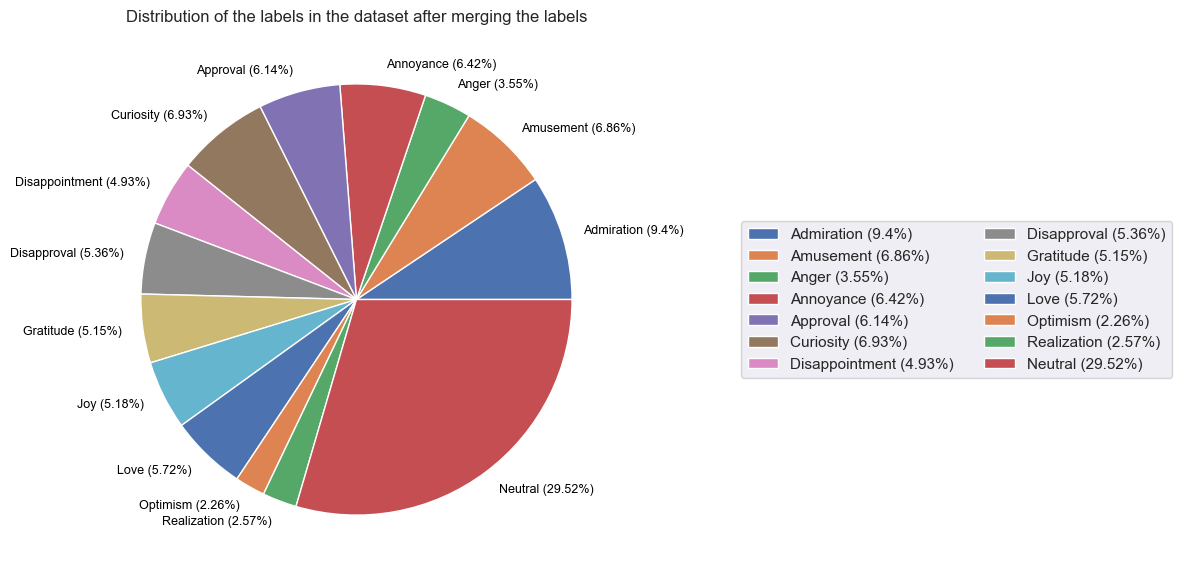

In [9]:
pct_labels1 = []
k, v = list(counts.keys()), list(counts.values())
for i in range(len(v)):
    pct = round(v[i]/sum(v) * 100,2)
    pct_labels1.append(k[i] + " (" + str(pct) + "%)")

# print(len(v), len(pct_labels1) )
plt.figure(figsize=(14,7))

plt.pie(v, labels=pct_labels1, textprops={'fontsize':9, 'color':'black'}, labeldistance=1.1)
plt.legend(loc="center left", ncol=2, bbox_to_anchor=(1.2, 0.5))
plt.title("Distribution of the labels in the dataset after merging the labels")
plt.show()

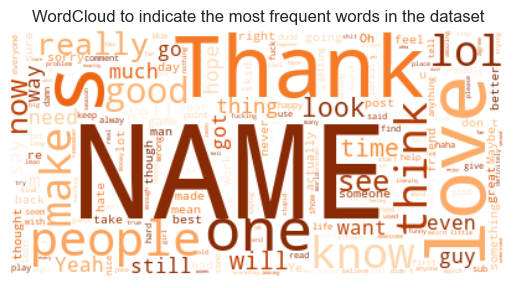

In [10]:
from wordcloud import WordCloud

text = ""

for words in data['text']:
    text += " " + words

wordcloud = WordCloud(background_color='white',
                      colormap='Oranges').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('WordCloud to indicate the most frequent words in the dataset')
plt.axis('off')
plt.show()

In [11]:
# from wordcloud import process_text

text_dict = wordcloud.process_text(text)
word_freq = {
    k: v
    for k, v in sorted(
        text_dict.items(), reverse=True, key=lambda item: item[1])
}

print(list(word_freq.items())[:5])

[('NAME', 9438), ('s', 2840), ('Thank', 2738), ('love', 2404), ('one', 2332)]


In [12]:
# label_guide.keys()

dict_keys(['Admiration', 'Amusement', 'Anger', 'Annoyance', 'Approval', 'Caring', 'Confusion', 'Curiosity', 'Desire', 'Disappointment', 'Disapproval', 'Disgust', 'Embarrassment', 'Excitement', 'Fear', 'Gratitude', 'Grief', 'Joy', 'Love', 'Nervousness', 'Optimism', 'Pride', 'Realization', 'Relief', 'Remorse', 'Sadness', 'Surprise', 'Neutral'])

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['labels'] = le.fit_transform(data['labels'])

df = pd.DataFrame()
df['Label Name'], df['Old Label'], df['New label after encoding'] = [
    list(label_guide.keys())[k] for k in le.classes_
], le.classes_, list(range(len(le.classes_)))

df

,Label Name,Old Label,New label after encoding
0,Admiration,0,0
1,Amusement,1,1
2,Anger,2,2
3,Annoyance,3,3
4,Approval,4,4
5,Curiosity,7,5
6,Disappointment,9,6
7,Disapproval,10,7
8,Gratitude,15,8
9,Joy,17,9


In [14]:
# export to csv

data.to_csv('modified_dataset.csv', index = False)